# Lab 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## 1

## A

We have researched the normal distribution about a point and corresponding z table values.

## B

In [2]:
stats.norm.cdf(0)

0.5

In [3]:
stats.norm.cdf(0.1)

0.539827837277029

In [4]:
stats.norm.cdf(-0.1)

0.460172162722971

In [5]:
stats.norm.cdf(0.5)

0.6914624612740131

In [6]:
stats.norm.cdf(-0.5)

0.3085375387259869

In [7]:
stats.norm.cdf(-0.86)

0.1948945212518084

In [8]:
stats.norm.cdf(0.93)

0.8238144577547422

## C

In [9]:
## Here, we check that the inverse of the integral of the normal distribution.
## Keep in mind the symmetric sigma along both wings of the distribution.

In [10]:
stats.norm.ppf(2.87e-7)

-4.999765776842555

In [11]:
stats.norm.ppf(.16)

-0.994457883209753

In [12]:
stats.norm.ppf(0.023)

-1.9953933101678247

In [13]:
stats.norm.ppf(.977)

1.9953933101678245

## D

## 2

## A

## B

In [14]:
s = 1
d = stats.lognorm.rvs(s, size = 100000)

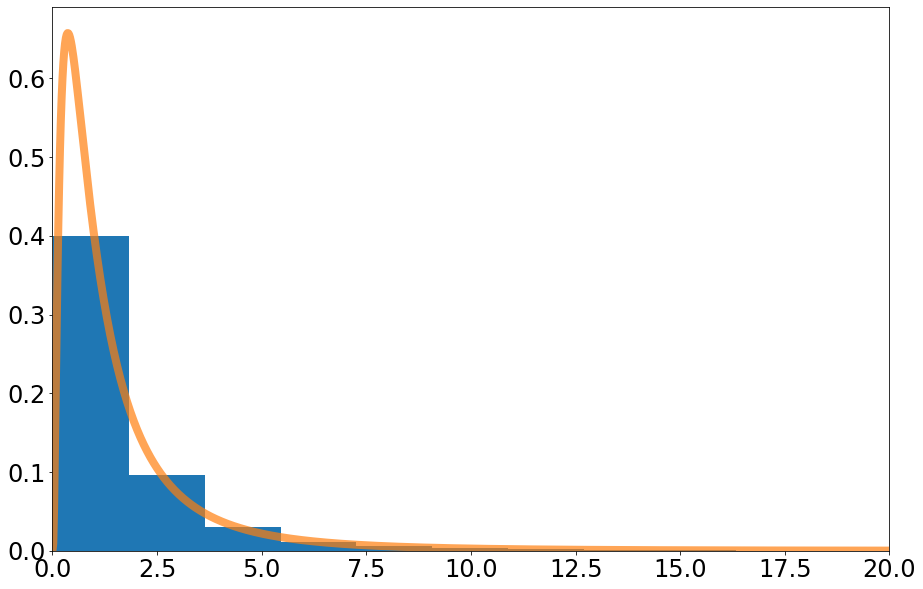

In [15]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(0,20,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

In [16]:
s = .5
d = stats.lognorm.rvs(s, size = 100000)

In [17]:
d

array([1.13513778, 0.94563642, 1.05122634, ..., 1.30689345, 0.49588314,
       0.80755566])

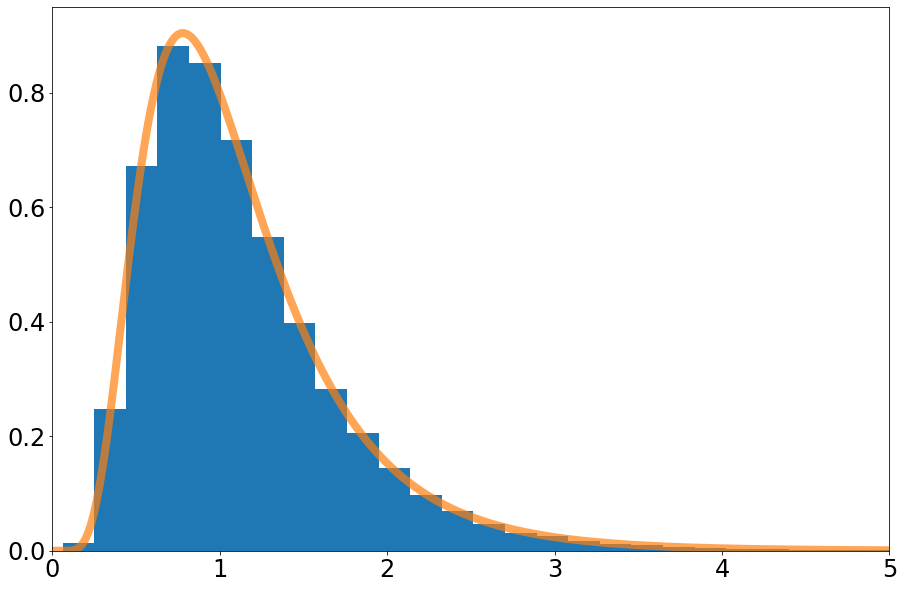

In [18]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

In [19]:
d = stats.chi2.rvs(df=50, size=100000)

In [20]:
d

array([47.23118517, 55.62997766, 50.08984624, ..., 36.69167486,
       76.21479468, 32.46591473])

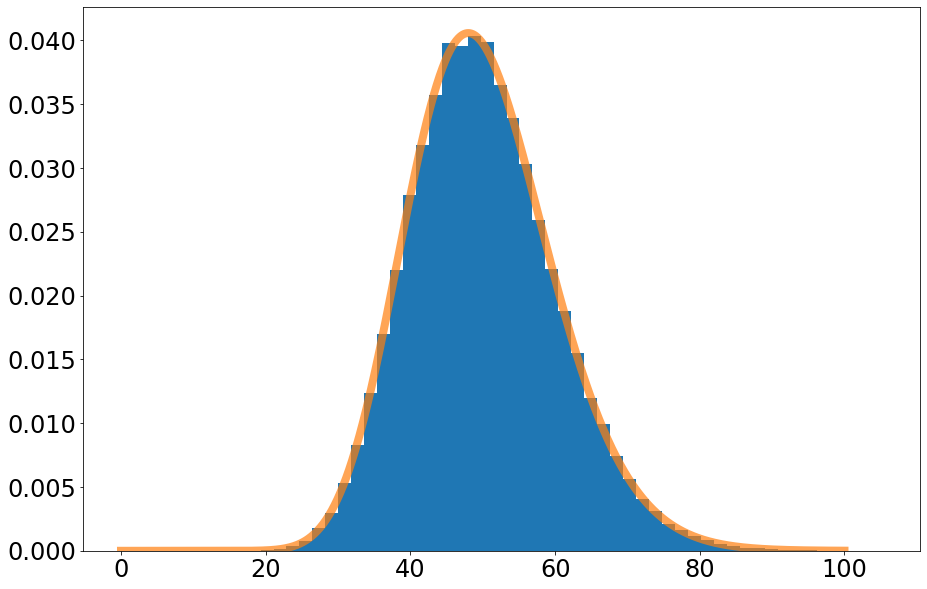

In [21]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
#plt.xlim([0,20])
x = np.linspace(0,100,1000)
ax.plot(x, stats.chi2.pdf(x, df=50),linewidth = 8,alpha = 0.7)
plt.show()

## 3

## A

## B

## C

## D

## 4

## Non-Continuous Distribution

## 1